Consider a set of coordinates that form an object - e.g. house.

Populating the interactive namespace from numpy and matplotlib


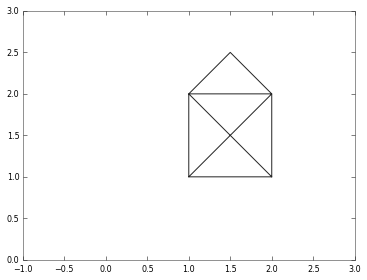

In [11]:
%pylab inline
D=np.array([[1,1],[2,1],[1,2],[2,2],[1.5,2.5],
            [1,2],[1,1],[2,2],[2,1]])
ax=plt.gca()
plt.plot(D[:,0],D[:,1])
plt.grid()
plt.xlim([-1,3])
plt.ylim([0,3])
ax.set_aspect(1);

Now we wish to rotate the house by an angle $\phi$. We can achieve this by multiplying the coordinates with a rotation matrix

$$R=\begin{pmatrix} \cos \phi & \sin \phi \\ -\sin \phi & \cos \phi \end{pmatrix}$$

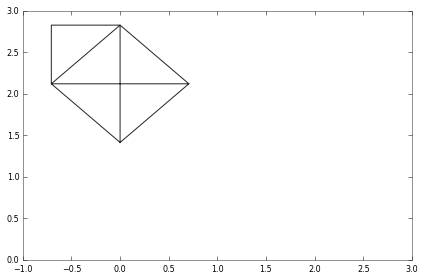

In [2]:
def phi2R(phi):
    c=np.cos(phi);s=np.sin(phi)
    return np.matrix([[c,s],[-s,c]])
R=phi2R(np.pi/4.)
Dnew= np.array(D*R)
plt.plot(Dnew[:,0],Dnew[:,1])
plt.grid()
plt.xlim([-1,3])
plt.ylim([0,3])
ax.set_aspect(1);

Here we rotate around the origin at (0,0). We can easily rotate around any other point by first translating to the origin, rotating and then translating back. Here we rotate around (1.5,1.5) which is the middle of the house.

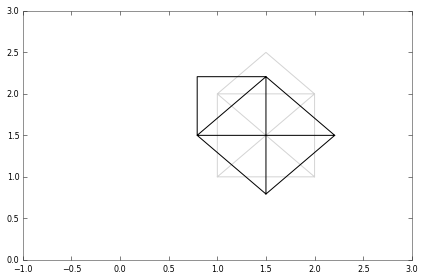

In [3]:
t=np.array([1.5,1.5],ndmin=2)
Dnew2= np.array((D-t)*R)+t
plt.plot(D[:,0],D[:,1],alpha=0.2)
plt.plot(Dnew2[:,0],Dnew2[:,1],color='k')
plt.grid()
plt.xlim([-1,3])
plt.ylim([0,3])
ax.set_aspect(1);

Finally, given two rotations $R_0=R(\theta_0)$ and $R_T=R(\theta_T)$ we can interpolate the intermediate steps  $t=1,\dots,T-1$ between these two rotations with $R_t=R(\alpha (\theta_T-\theta_0))$ where $\alpha \in [0,1]$ is the mixing coefficient.

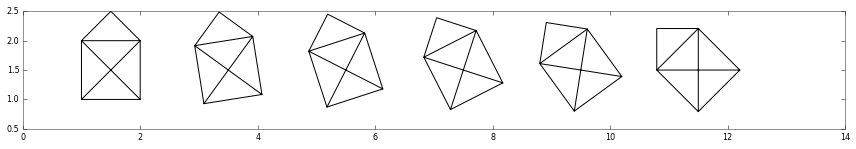

In [4]:
plt.figure(figsize=(12,3))
R2=np.eye(2)
th=np.arccos(R[0,0])
th2=np.arccos(R2[0,0])
for a in np.linspace(0,1,6):
    Rnew=phi2R(a*(th-th2)+th2)
    Dnew=np.array((D-t)*Rnew)+t+np.array([a*10,0],ndmin=2)
    plt.plot(Dnew[:,0],Dnew[:,1],color='k')
    #print np.linalg.norm(Dnew[0,:]-Dnew[1,:])
plt.gca().set_aspect(1)
plt.grid()

Now we look at rotations in 3D. Again, consider a collection of points. 

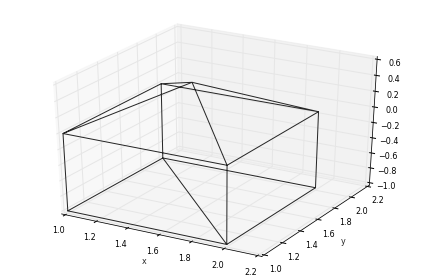

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax = fig.gca(projection='3d')
D=np.array([[1,1,-1],[1,1,0],[1,2,0],[1,2,-1],[1,1,-1],
    [2,1,-1],[2,1,0],[1,1,0],[1.5,1.5,0.5],[1,2,0],
    [2,2,0],[1.5,1.5,0.5],[2,1,0],[2,2,0],[2,2,-1],
    [1,2,-1],[2,1,-1],[2,2,-1]])
ax.plot(D[:,0],D[:,1],D[:,2]);
plt.xlabel('x')
plt.ylabel('y');

Rotation is not so straight-forward because there are three axes. We can rotate around the z axis by multiplying the coordinates with

$$R_z=\begin{pmatrix}  \cos \phi & \sin \phi & 0 \\ -\sin \phi & \cos \phi & 0 \\ 0 & 0 & 1 \end{pmatrix} $$ 

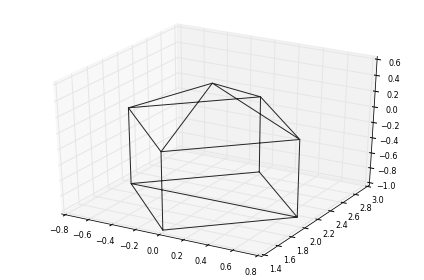

In [6]:
phi=np.pi/4.
c=np.cos(phi);s=np.sin(phi)
R=np.matrix([[c,s,0],[-s,c,0],[0,0,1]])
Dnew= np.array(D*R)
fig=plt.figure()
ax = fig.gca(projection='3d')
ax.plot(Dnew[:,0],Dnew[:,1],Dnew[:,2]);

We can similarly rotate around y and x axis with 

$$R_y=\begin{pmatrix}  \cos \phi & 0 & \sin \phi \\ 0 & 1 & 0 \\ -\sin \phi & 0 &\cos \phi  \end{pmatrix} $$ 

$$R_x=\begin{pmatrix}  1 & 0 & 0 \\ 0 & \cos \phi & \sin \phi \\ 0 & -\sin \phi & \cos \phi \end{pmatrix} $$ 

We can then perform any desired rotation by rotating $\phi_x, \phi_y,\phi_z$ consecutively along the $x,y,z$ axis. In this case (which depends on the order of the axes, i.e. formula for $z,y,x$ has different form) the resulting formula is given by $R_x \cdot R_y \cdot R_z$ which is

In [7]:
def phi2R(phi):
    c=np.cos(phi);s=np.sin(phi)
    out=np.matrix([[c[1]*c[2],-c[1]*s[2],s[1]],
             [c[0]*s[2]+c[2]*s[0]*s[1],
              c[0]*c[2]-s[0]*s[1]*s[2],-c[1]*s[0]],
             [s[0]*s[2]-c[0]*c[2]*s[1],
              c[2]*s[0]+c[0]*s[1]*s[2],c[0]*c[1]]])
    return out

How should we interpolate intermediate rotation steps? One possible approach that won't work is to interpolate the rotation matrices $R_t= \alpha R_0 + (1-\alpha) R_T$.

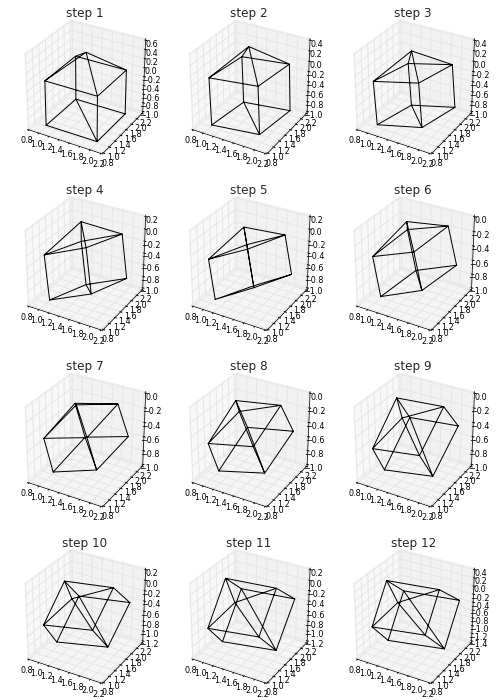

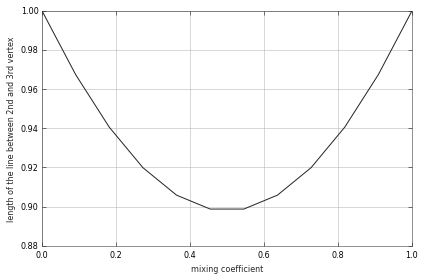

In [8]:
fig=plt.figure(figsize=(7,10))
phi=np.array([-np.pi/4.,2*np.pi/3,np.pi/2.])
R1=phi2R(phi)
R2=np.eye(3)
d=[]
t=np.array([1.5,1.5,-0.5],ndmin=2);k=1
for a in np.linspace(0,1,12):
    temp=np.array((D-t)*(a*R1+(1-a)*R2))
    Dnew=temp+t
    ax = fig.add_subplot(4,3, k, projection='3d');k+=1
    d.append(np.linalg.norm(Dnew[4,:]-Dnew[3,:]))
    ax.plot(Dnew[:,0],Dnew[:,1],Dnew[:,2],color='k')
    plt.xlim([0.8,2.2])
    plt.ylim([0.8,2.2])
    plt.title('step %d'%(k-1))
    ax.set_aspect(1)
plt.figure()
plt.plot(np.linspace(0,1,12),d)
plt.xlabel('mixing coefficient')
plt.ylabel('length of the line between 2nd and 3rd vertex');

We see that the intermediate steps do not describe the shortest path between the initial and final rotations. In particular compare step 5 to step 1 and step 12. More seriously, the intermediate matrices are not proper rotation matrices - they do not preserve the length of the lines. This can be seen in the bottom graph.  

As in 2D we can interpolate by scaling the rotation angles and then multiply with a rotation matrix corresponding to the scaled angles.

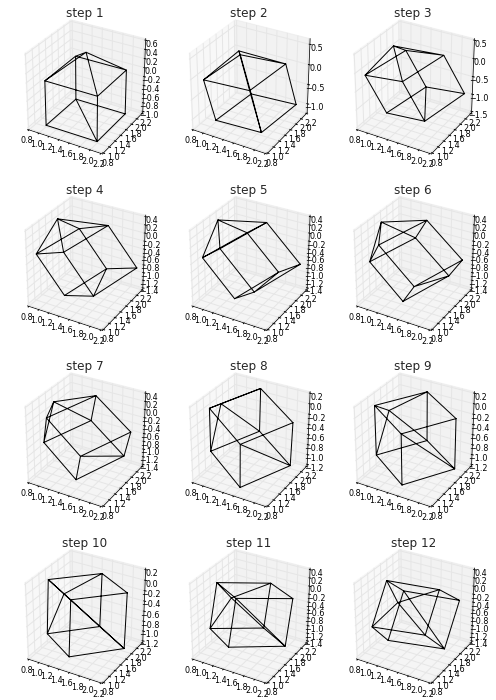

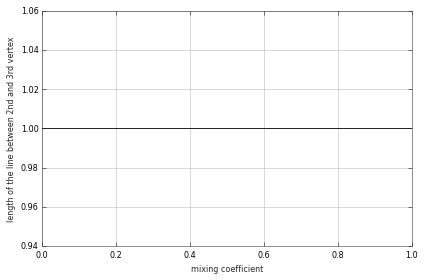

In [9]:
fig=plt.figure(figsize=(7,10))
d=[]
t=np.array([1.5,1.5,-0.5],ndmin=2);k=1
for a in np.linspace(0,1,12):
    temp=np.array((D-t)*phi2R(phi*a))
    Dnew=temp+t
    ax = fig.add_subplot(4,3, k, projection='3d');k+=1
    d.append(np.linalg.norm(Dnew[4,:]-Dnew[3,:]))
    ax.plot(Dnew[:,0],Dnew[:,1],Dnew[:,2],color='k')
    plt.xlim([0.8,2.2])
    plt.ylim([0.8,2.2])
    plt.title('step %d'%(k-1))
    ax.set_aspect(1)
plt.figure()
plt.plot(np.linspace(0,1,12),d)
plt.xlabel('mixing coefficient')
plt.ylabel('length of the line between 2nd and 3rd vertex');

This method works well. The bottom graph shows that the line length is preserved

Another alternative is to use quaternions to rotate. Quaternion is a four element vector given by

$$ \begin{pmatrix} \mathbf{n}\cdot sin \frac{\theta}{2} \\ \cos \frac{\theta}{2} \end{pmatrix}$$ 

and describes the rotation by $\theta$ radians around the axis $\mathbf{n}$ which is given as a unit-norm vector.

The quaternion representation is minimal and hence more elegant than rotation along three angles. The later requires three angles and the choice of the three axes - 6 parameters in total. The quaternion representations requires only four parameters. Often it is also easier to use. Let's look at quaternions in more detail.

Quaternion multiplication is defined by

$$ \begin{pmatrix} \mathbf{n_1} \\ w_1 \end{pmatrix} \begin{pmatrix} \mathbf{n_2} \\ w_2 \end{pmatrix}= \begin{pmatrix} w_1\mathbf{n_2}+w_2\mathbf{n_1}+ \mathbf{n_1}\times \mathbf{n_2}\\ w_1 w_2-\mathbf{n_1}\mathbf{n_2} \end{pmatrix} $$

where $\times$ is the vector cross-product.

We use this multiplication to rotate a point. First we turn the 3-coordinate vector $\mathbf{c}$ into quaternion and then we use quaternion multiplication twice to obtain the rotated vector $\mathbf{c}'$ 

$$ \begin{pmatrix} \mathbf{c}' \\ 0 \end{pmatrix} = \begin{pmatrix} \mathbf{n}\cdot \sin (\theta /2) \\ \cos (\theta / 2) \end{pmatrix}   \begin{pmatrix} \mathbf{c} \\ 0 \end{pmatrix} \begin{pmatrix} -\mathbf{n}\cdot \sin (\theta /2) \\ \cos (\theta /2) \end{pmatrix}$$

By aplying this formula twice we see that consecutive rotation by quaternions $q_1$ and $q_2$ is equal to a rotation by a quaternion $q_3=q_1 q_2$.

As a consequence rotating twice by $q$ is equal to quaternion multiplication by 

$$q^2 = \begin{pmatrix} \mathbf{n}\cdot \sin (2 \theta /2) \\ \cos (2 \theta /2) \end{pmatrix}$$ 

and it can be shown that in general 

$$q^\alpha = \begin{pmatrix} \mathbf{n}\cdot \sin (\alpha \theta /2) \\ \cos (\alpha \theta /2) \end{pmatrix}$$ 

With this formula we can create quaternions with $\alpha \in [0,1]$ that describe the intermediate rotation steps. 

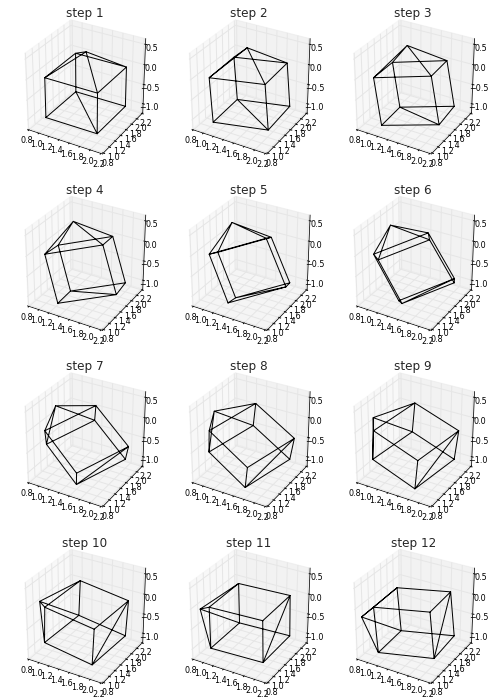

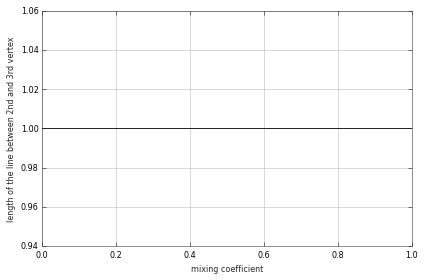

In [10]:
def quaternion(n,phi):
    q=np.zeros(4)
    q[:3]=n*np.sin(phi/2.)
    q[3]=np.cos(phi/2.)
    return q

def quatMultiply(q1,q2):
    out=np.zeros(4)
    out[:3]=q1[3]*q2[:3]+q2[3]*q1[:3]+np.cross(q1[:3],q2[:3])
    out[3]=q1[3]*q2[3]-q2[:3].dot(q1[:3])
    return out

def quatRotate(q,c):
    c=np.atleast_2d(c)
    res=np.zeros(c.shape)
    for k in range(c.shape[0]):
        qi=np.copy(q);qi[:3]= -qi[:3]
        p=np.zeros(4);p[:3]=c[k,:]
        temp=quatMultiply(q,p)
        res[k,:]=quatMultiply(temp,qi)[:3]
    return res

fig=plt.figure(figsize=(7,10))
phi= -3*np.pi/4.
n=np.array([3**-0.5,3**-0.5,-3**-0.5])

d=[]
t=np.array([1.5,1.5,-0.5],ndmin=2);k=1
for a in np.linspace(0,1,12):
    q=quaternion(n,a*phi)
    temp= quatRotate(q,D-t)
    Dnew=temp+t
    ax = fig.add_subplot(4,3, k, projection='3d');k+=1
    d.append(np.linalg.norm(Dnew[4,:]-Dnew[3,:]))
    ax.plot(Dnew[:,0],Dnew[:,1],Dnew[:,2],color='k')
    plt.xlim([0.8,2.2])
    plt.ylim([0.8,2.2])
    ax.set_zlim(-1.2,0.6)
    plt.title('step %d'%(k-1))
    ax.set_aspect(1)
plt.figure()
plt.plot(np.linspace(0,1,12),d)
plt.xlabel('mixing coefficient')
plt.ylabel('length of the line between 2nd and 3rd vertex');

The quaternion rotation provides the correct solution. The bottom graph shows that the line length is preserved.